In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [14]:
import csv
def file_names(df):
    with open(df) as training_file:
        reader = csv.reader(training_file, delimiter=',')    
        next(reader,None)
        images=[]
        labels=[]
        for rows in reader:
            lbl=rows[0]
            pixels=rows[1:]
            pixels=np.array(pixels).reshape((28,28))
            
            images.append(pixels)
            labels.append(lbl)
    images=np.array(images).astype(float)
    labels=np.array(labels).astype(float)
    return images,labels
            
           
        


In [15]:
training_images,training_labels=file_names(r'C:\Users\shive\OneDrive\Desktop\Sign Language data\sign_mnist_train.csv')
test_images,test_labels=file_names(r'C:\Users\shive\OneDrive\Desktop\Sign Language data\sign_mnist_test.csv')
training_images=np.expand_dims(training_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)
print(test_images.shape)

(7172, 28, 28, 1)


In [19]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(26,activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               410112    
_________________________________________________________________
dense_5 (Dense)              (None, 26)               

In [20]:

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    
    )

test_datagen = ImageDataGenerator(
    rescale=1 / 255
    )
training_generator=train_datagen.flow(training_images,
                  training_labels,
                  batch_size=64)
test_generator=test_datagen.flow(test_images,
                                test_labels,
                                batch_size=64)

In [22]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy')>.85:
            print('reached 85% acc')
            self.model.stop_training=True

In [24]:
callbacks=myCallback()
history = model.fit_generator(training_generator,
    
    epochs=25,
    
    validation_data=test_generator,
    callbacks=[callbacks]
                            
                             )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
429/429 [==============================] - 16s 38ms/step - loss: 2.7850 - accuracy: 0.1575 - val_loss: 2.2708 - val_accuracy: 0.2407
Epoch 2/25
429/429 [==============================] - 17s 39ms/step - loss: 2.1309 - accuracy: 0.3312 - val_loss: 1.5840 - val_accuracy: 0.4466
Epoch 3/25
429/429 [==============================] - 16s 38ms/step - loss: 1.7849 - accuracy: 0.4341 - val_loss: 1.3020 - val_accuracy: 0.5512
Epoch 4/25
429/429 [==============================] - 16s 37ms/step - loss: 1.5322 - accuracy: 0.5096 - val_loss: 0.9653 - val_accuracy: 0.6544
Epoch 5/25
429/429 [==============================] - 16s 37ms/step - loss: 1.3455 - accuracy: 0.5655 - val_loss: 0.9583 - val_accuracy: 0.6832
Epoch 6/25
429/429 [==============================] - 16s 38ms/step - loss: 1.2044 - accuracy: 0.6091 - val_loss: 0.6880 - val_accuracy: 0.7704
Epoch 7/25
429/429 [==============================] - 17s 39

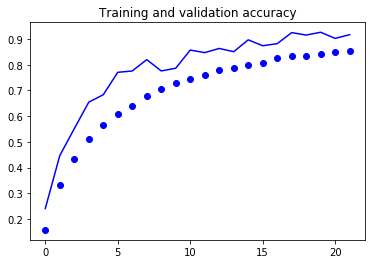

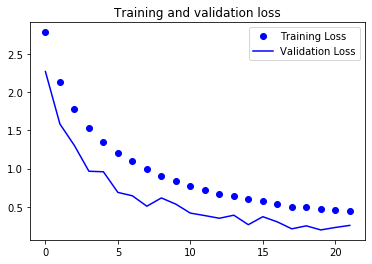

In [25]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')

plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [61]:
import os
path=r'C:\Users\shive\OneDrive\Desktop\Sign Language data\validation_data'
uploaded=os.path.join(path)
os.listdir(uploaded)

['a.png', 'B.jpg', 'X.jpg']

In [62]:
from tensorflow.keras.preprocessing import image
import numpy as np



for names in os.listdir(uploaded):
    str=r'C:\Users\shive\OneDrive\Desktop\Sign Language data\validation_data'
    str=str+'\\'+names
    
    
    img=image.load_img(str,target_size=(28, 28),color_mode='grayscale')
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    i=np.argmax(classes)
    print(names,' is predicted as ', chr(65+i))

a.png  is predicted as  A
B.jpg  is predicted as  I
X.jpg  is predicted as  X
